<center>
<img src="logo.png" height="900"> 
</center>


#  Обсчёт АБ-теста

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

Давайте представим, что у нас с вами есть сервис, который работает по подписке (онлайн игра, стриминговый сервис, например). Один из важных факторов успешности бизнеса в таком случае - это удержание пользователей, нам надо придумать, как заинтересовать пользователя в продлении подпсики. Возникла идея дать скидку в $1\%$ на продление подписки. Чтобы оценить эфект от этой идеи мы как-то разбили пользователей, которые купили подписку за период теста, на две группы и одним дали скидку на продление, а другим нет.

In [25]:
df1 = pd.read_csv('subscribers_1.csv', sep=',')
print(df1.shape)
df1.head( 20)

(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,1
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,1
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0
5,95644,929,subscription,3_month,1,2019-03-11,30.0,90,0,1
6,105119,929,subscription,1_month,1,2018-12-01,30.0,30,1,1
7,124714,929,subscription,1_month,2,2019-01-18,30.0,30,1,1
8,131352,929,subscription,1_month,1,2018-12-16,30.0,30,1,1
9,131976,929,subscription,1_month,2,2019-01-09,30.0,30,1,0


* `rn` - порядковый номер покупки подписки за период.  
* `last_duration_days` - длительность предыдущей подписки.
* `new_duration_days` - длительность текущей подписки.
* `is_same` - менялась ли длительность подписки.
* `group` - группа теста, в которую попал пользователь. 1 - тест, 0 - контроль.

__а)__ Обсчитайте результаты АБ-теста. Найдите разницу между старой и новой длительностями подписки. Постройте для этой разницы гистограмму. Подумайте и дайте себе ответ на следующие вопросы:

- Можно ли воспользоваться предпосылкой о нормальности распределения приростов и проверить гипотезу тестом Уэлча? 
- Переменная, для которой мы проводим тест имеет дискретное распределение. Можно ли здесь использовать тест Манна-Уитни? Даст ли это коректный результат? 
- Будет ли корректно использовать для проверки гипотезы ЦПТ и тест о равенстве средних, основанный на ней? 

(0.7478357337395317, 0.4545592453826257)

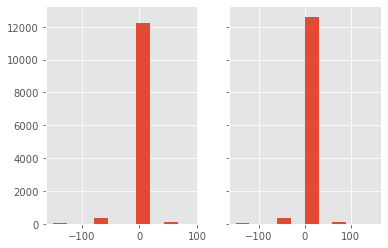

In [55]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
from statsmodels.stats.weightstats import ztest
df_control=df1[df1['group']==0]
df_test=df1[df1['group']==1]
n_control=df_control.shape[0]
n_test=df_test.shape[0]
diff_control=df_control['last_duration_days']-df_control['new_duration_days']
diff_test=df_test['last_duration_days']-df_test['new_duration_days']
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(diff_control)
ax2.hist(diff_test)
sts.mannwhitneyu(diff_test,diff_control,alternative='greater')
sts.ttest_ind(diff_test, diff_control, equal_var = False)
ztest(diff_test,diff_control)
# your code here
# your code here


Правда ли, что средняя длительность подписки изменилась на $1\%$ уровне значимости? Для ответа на этот вопрос воспользуйтесь асимптотическим тестом на равенство средних против двусторонней альтернативы. Сохраните в переменную `z_obs` получившееся значение статистики, а в `pvalue` получившееся $p$-значение.

In [56]:
ztest(diff_test,diff_control)

(0.7478357337395317, 0.4545592453826257)

In [64]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
z_obs,pvalue=ztest(diff_test,diff_control)

# your code here


In [58]:
# проверка того, что задание решено верно
assert np.abs(z_obs) < 1
assert np.abs(z_obs) > 0.7

# подобные тесты скрыты от вас 


__б)__ А теперь представим, что мы продвинутые АБ-тестеры и решили провести ААБ тест (2 контрольные группы и одну тестовую).

In [62]:
df2 = pd.read_csv('subscribers_2.csv', sep=',')
print(df2.shape)
df2.head( )

(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,new_group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,2
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,2
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0


* `new_group` - группа теста, в которую попал пользователь. $2$ - тест, $0,1$ - контроль.

Проверьте гипотезу о том, что в каждой из контрольных групп среднее совпадает с тестовой на уровне значимости $1\%$. Получившиеся $p$-значения запишите в переменные `pval_1` и `pval_2`. Сделайте корректировку методом Холма. Запишите количество отвергнутых гипотез в переменную `hyp_cnt`. 

In [90]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
from statsmodels.sandbox.stats.multicomp import multipletests 
df_control0=df2[df2['new_group']==0]
df_control1=df2[df2['new_group']==1]
df_test=df2[df2['new_group']==2]
n_control0=df_control0.shape[0]
n_control1=df_control1.shape[0]
n_test=df_test.shape[0]
diff_control0=df_control0['last_duration_days']-df_control0['new_duration_days']
diff_control1=df_control1['last_duration_days']-df_control1['new_duration_days']
diff_test=df_test['last_duration_days']-df_test['new_duration_days']
_, pval_1=ztest(diff_test,diff_control0)
_, pval_2=ztest(diff_test,diff_control1)
pvals=np.array([pval_1,pval_2])
pvals
rejected, p_corrected, _, _ = multipletests(pvals, 
                                            alpha = 0.01, 
                                            method = 'holm') 
rejected.sum()
#pval_1 = ...
#pval_2 = ...
hyp_cnt = rejected.sum()
hyp_cnt
#diff_control1
# your code here


0

In [89]:
# проверка того, что задание решено верно
assert pval_1 < 0.5
assert pval_1 > 0.4
assert pval_2 > 0.3
assert pval_2 < 0.4

# подобные тесты скрыты от вас 

Какие выводы можно сделать из этого теста?  Валиден ли такой тест?  Если нет, то в чем может быть проблема? Если тут вообще смысл делать поправку Холма?